# AdventureWorks Försäljning analys

I denna analys undersöker vi AdventureWorks-databasen för att besvara affärsfrågor som exempelvis:
- Produktkategorier och deras försäljning
- Försäljningstrender över tid
- Regional Försäljning

Använder SQL för att hämta data och Python för visualisering och analys.

In [1]:
import pandas as pd
import numpy as np
from src.report import SqlReport
from src.viz import (
    viz_products_per_category,
    viz_barh_by_revenue,
    viz_sell_per_month,
    viz_sell_order_per_month,
    
)
from src.metrics import(
    year_month_combined,
)
import matplotlib.pyplot as plt

sql_report = SqlReport()

anslutning till sql server lyckades


c:\Users\VBMar\OneDrive\Skrivbord\Python Code\Skola\GitAllowed\SQLInlämning_Marcus\src\io_utiles.py:24: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():



# Mall

## Title

### Affärsfråga


### Metod
Jag använder tabellerna:
-   
-   
-   

Steg:
1.   
2.   
3. 


## Vad visar visualiseringen? 



## Vad kan vi lära oss?



## Insikter 

In [ ]:
query_1 = """
SELECT TOP 5 *
FROM Person.person
"""
query_1_df = sql_report.query_df(query_1)
query_1_df.head()

## 1. Antal produkter per kategori

### Affärsfråga
Hur många produkter finns i varje kategori?

### Metod
Jag använder tabellerna:
- Production.ProductCategory  
- Production.ProductSubcategory  
- Production.Product  

Steg:
1. JOIN mellan kategorier, underkategorier och produkter  
2. Räkna DISTINCT ProductID per kategori  
3. Returnera resultatet som en DataFrame och visualisera med ett vertikalt stapeldiagram

In [ ]:
query_category_total = """
SELECT

    pc.Name as ProductName,
    COUNT(DISTINCT(p.ProductID)) as amount

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
GROUP BY pc.Name
"""
query_category_total_df = sql_report.query_df(query_category_total)
viz_products_per_category(query_category_total_df)

## Vad visar visualiseringen? 

visualiseringen Visar fyra produkterkategorier, Components är störst följt av Bikes, Cloth och accessories har betydligt färre produkter. 

## Vad kan vi lära oss?

Sortimentet är dominerat av components och bikes, Sortimentet av Cloth och Accessories är en mindre del av utbudet. 

## Insikter – Antal produkter per kategori

Components är den största kategorin med 134 produkter, följt av Bikes med 97. 
Accessories är den minsta kategorin med endast 29 produkter.

Detta tyder på att företaget har ett brett sortiment inom Components och Bikes, 
medan Accessories är ett betydligt mindre område och kan vara en potentiell utvecklingsmöjlighet.


## 2: Försäljning per produktkategori

### Affärsfråga
Vilka produkterkategorier säljer mest.

### Metod
Jag använder tabellerna:
-   Production.ProductCategory
-   Production.ProductSubcategory
-   Production.Product
-   Sales.SalesOrderDetail

Steg:
1. JOIN mellan Category, SubCategory, Product och SalesDetail
2. Räknar total försäljning per category
3. return i en Dataframe med productname och revenue och gör en visualisering med ett horisontellt stapeldiagram

c:\Users\VBMar\OneDrive\Skrivbord\Python Code\Skola\GitAllowed\SQLInlämning_Marcus\src\viz.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Total försäljning per produktkategori'}, xlabel='Revenue'>)

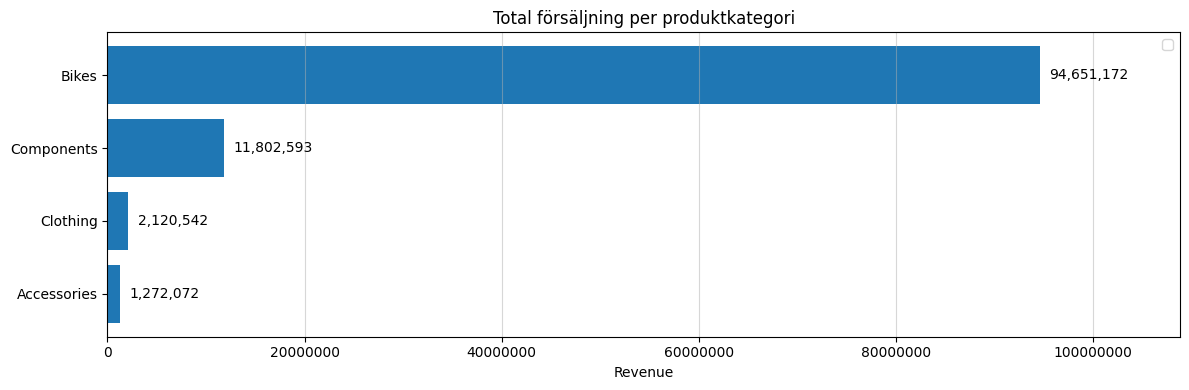

In [2]:

query_sell_per_category ="""
SELECT

    pc.Name as ProductName,
    SUM(sod.LineTotal) as Revenue

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
INNER JOIN Sales.SalesOrderDetail as sod on p.ProductID = sod.ProductID
GROUP BY pc.Name
ORDER BY SUM(sod.LineTotal) DESC
"""
query_sell_per_category_df = sql_report.query_df(query_sell_per_category)
viz_barh_by_revenue(query_sell_per_category_df,"Total försäljning per produktkategori")

## Vad visar visualiseringen? 

Visualiseringen visar fyra produktkategorier och deras totala revenue. Bikes står för den klart största delen av revenue, betydligt mer än de andra tre kategorierna tillsammans. components är näst störst, medans cloth and accessories har mycket mindre revenue.

## Vad kan vi lära oss?

Bikes är den dominante revenue-kategori, utgör majoriteten av deras revenue, components bidrar i viss uträckning, medans cloths och accessories står för mycket liten del av revenue-fördelningen.

## Insikter – Hur mycket pengar kommer in per kategori

Bikes står för 94 651 172 (≈ 86%) i försäljning (sales), components för 11 802 593(≈ 10.7%) medans cloth 2 120 542(≈ 1.9%) och accessories 1 272 072(≈ 1.16%) för en total försäljning på 109 846 379

Bör lägga fokus på Bikes sales och hålla ögonen på components.

## 3: Försäljningstrend över tid

### Affärsfråga

Hur har försäljningen utvecklats över tid?

### Metod
Jag använder tabellerna:
-   Sales.SalesOrderHeader

Steg:
1.  JOIN mellan Sales.SalesOrderDetail och SaleOrderHeader
2.  Göra om Year and Month till Year-Month
3.  Visualize revenue per month ifrån mitt 2022 till 2024 

Notering: Exkluderade År 2025 eftersom databasen endast har fram till 2025-06.

In [ ]:
query_sell_per_month ="""
SELECT

    YEAR(soh.OrderDate) as OrderYear,
    MONTH(soh.OrderDate) as OrderMonth,
    SUM(soh.SubTotal) as Revenue

FROM Sales.SalesOrderHeader as soh
WHERE YEAR(soh.OrderDate) < 2025
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY YEAR(soh.OrderDate), MONTH(soh.OrderDate) ASC
"""
query_sell_per_month_df = sql_report.query_df(query_sell_per_month)
viz_sell_per_month(query_sell_per_month_df)

## Vad visar visualiseringen? 

Visualiseringen visar ett linjediagram av monthly revenue från 2022-05 till 2025-01. Revenue varierar med återkommande toppar och lägre nivåer varje år, och övergripande uppåtgående trend. 

## Vad kan vi lära oss?

Tydliga återkommande mönster i revenue varje år, med perioder av högre och lägre nivåer. Den övergripande trenden indikerar revenue ökning över tid.

## Insikter - försäljning per månad 

Försäljningen uppvisar tydlig säsongsvariation. Toppnivåerna återkommer våren, tidig höst och i slutet av året.
Trenden ökar svagt över tid vilket indikerar en uppåtgående trend.
Försäljningen är som störst vid tidig höst och som lägst efter nyår. 

Rekommendationer:
Bemanningen anpassas inför återkommande toppar (Våren, Tidig Höst, Slutet av Året).
Planera kampanjer inför höstsäsongen samt erbjuda rabatter efter nyår. 

## 4: Försäljning och antal ordrar per år

### Affärsfråga

Hur ser total försäljning och antal ordrar ut per år?

### Metod
Jag använder tabellerna:
-   Sales.SalesOrderHeader   
   

Steg:
1.   COUNT antal ordrar och total revenue på YEAR av orderdate.
2.   Gör ett diagram med två bars som visar antal order och revenue per på.
3.   Skala ner revenue så den kan jämföras med antal order.


In [ ]:
query_sell_order_per_year = """
SELECT

COUNT(*) as AmountOrders,
YEAR(soh.OrderDate) as OrderYear,
SUM(soh.SubTotal) as Revenue

FROM Sales.SalesOrderHeader as soh
GROUP BY YEAR(soh.OrderDate)
ORDER BY YEAR(soh.OrderDate) ASC
"""
query_sell_order_per_year_df = sql_report.query_df(query_sell_order_per_year)
viz_sell_order_per_month(query_sell_order_per_year_df)

## Vad visar visualiseringen? 

visualiseringen visar ett stapeldiagram från året 2022 till 2025 med två bars: blå för antal orders och orange för revenue. Revenue är skalad genom att dela med 3000 för att göra värderan jämförbara. 

## Vad kan vi lära oss?

Under 2022 och 2023 är antalet orders relativt lågt samtidigt som revenue ligger på en hög nivå. Under 2024 ökar antalet orders medan revenue inte ökar i samma takt. år 2025 visar högt antal order, men revenue är betydligt lägre.

# Insikter - Order jämfört med revenue per på.

- 2022 och 2023 har relativt få orders men hög revenue. 
- 2024 visar tydlig ökning i både antal revenue och order, antalet orders har ökat betydligt mer än revenue. 
- 2025 ligger fortfarande höt i antal orders men revenue är markant lägre jämfört med föregående år.


## 5: Top 10 produkter

### Affärsfråga

Vilka 10 produkter genererar mest försäljning?

### Metod
Jag använder tabellerna:
-   Sales.SalesOrderDetail
-   Production.Product
   
Steg:
1. SELECT TOP 10 för att bara få top 10 med högst total försäljning baserat på ORDER BY Revenue DESC.
2. INNER JOIN mellan Production.Product och Sales.SalesOrderDetail Grupperar med GROUP BY Production name.
3. Visualiserar resultatet med ett horisontellt stapeldiagram för top 10 produkter efter störst försäljning.

(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Top 10 produkter efter försäljning'}, xlabel='Revenue'>)

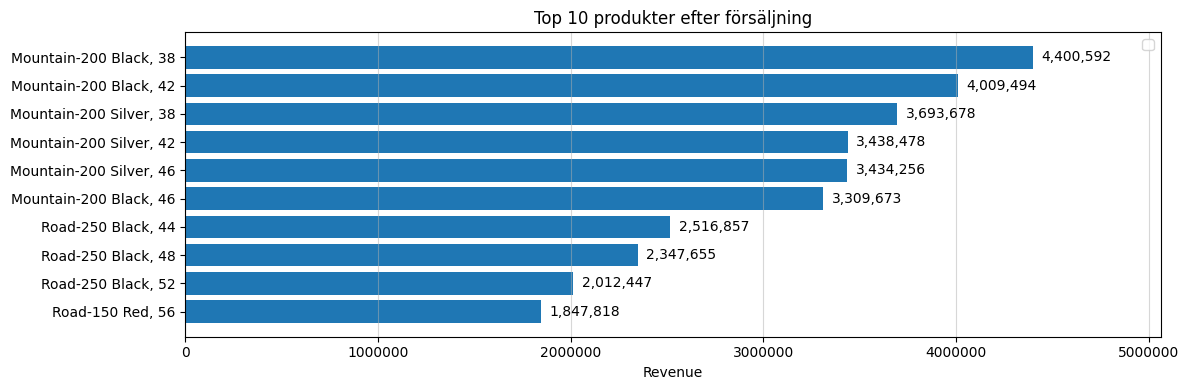

In [3]:
query_top10_product_revenue = """
SELECT TOP 10

p.Name as ProductName,
SUM(sod.LineTotal) as Revenue

FROM Production.Product as p
INNER JOIN Sales.SalesOrderDetail as sod ON p.ProductID = sod.ProductID
GROUP BY p.Name
ORDER BY Revenue DESC
"""
query_top10_product_revenue_df = sql_report.query_df(query_top10_product_revenue)
query_top10_product_revenue_df.head(10)
viz_barh_by_revenue(query_top10_product_revenue_df,title="Top 10 produkter efter försäljning")

C:\Users\VBMar\AppData\Local\Temp\ipykernel_12548\2568542341.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


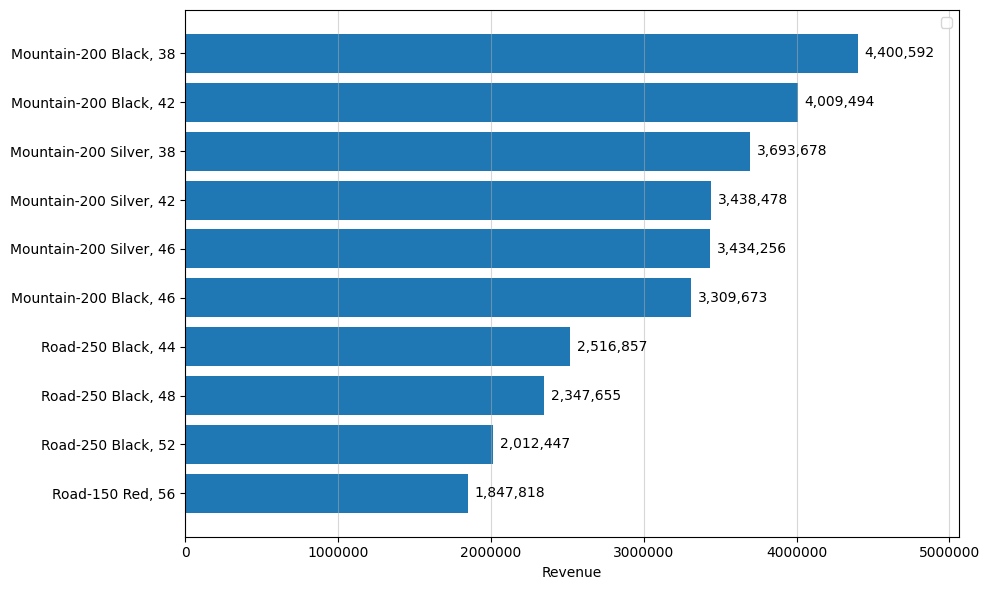

In [13]:
fig ,ax = plt.subplots(figsize=(10,6))

df = query_top10_product_revenue_df.sort_values("Revenue", ascending=True)
bars = ax.barh(df["ProductName"], df["Revenue"])

for bar in bars:
    width = bar.get_width()
    ax.text(width + df["Revenue"].max() * 0.01,
            bar.get_y() + bar.get_height()/2,
            f"{int(width):,}",
            va="center", ha="left", fontsize=10)
ax.set_xlabel("Revenue")
ax.set_xlim(0, df["Revenue"].max() * 1.15)
ax.ticklabel_format(style="plain", axis="x")
ax.grid(True, axis="x", alpha=0.5)
ax.legend()

plt.tight_layout()
